<a href="https://colab.research.google.com/github/bonareri/Bitcoin-Prediction-Analysis/blob/main/prophet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Install the Necessary Library

In [1]:
# Installing the reuired library
!pip install prophet

In [2]:
# Data handling and visualization
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# For Facebook Prophet (time series forecasting)
from prophet import Prophet
from prophet.plot import plot_plotly

# Evaluiation
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 2: Load and Prepare the Dataset

In [42]:
# Load preprocessed data
df = pd.read_csv('/content/bitcoin_prices_preprocessed.csv')

# Display the first few rows of the data
df.head()

,Date,Open,High,Low,Close,Volume,Daily_Return,MA7,MA30
0,2015-03-07,272.294006,277.854004,270.132996,276.260986,17825900,0.012973,273.689715,244.523235
1,2015-03-08,276.433014,277.858002,272.565002,274.354004,22067900,-0.006903,275.711430,246.259502
2,2015-03-09,274.812012,292.700989,273.893005,289.606995,59178200,0.055596,277.702427,248.321268
3,2015-03-10,289.862000,300.044006,289.743011,291.760010,67770800,0.007434,279.139287,250.599535
4,2015-03-11,291.524994,297.390991,290.507996,296.378998,33963900,0.015831,282.465999,253.141835


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3625 non-null   object 
 1   Open          3625 non-null   float64
 2   High          3625 non-null   float64
 3   Low           3625 non-null   float64
 4   Close         3625 non-null   float64
 5   Volume        3625 non-null   int64  
 6   Daily_Return  3625 non-null   float64
 7   MA7           3625 non-null   float64
 8   MA30          3625 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 255.0+ KB


In [44]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime format
df.set_index('Date', inplace=True)  # Set as index

In [45]:
df.head()

,Open,High,Low,Close,Volume,Daily_Return,MA7,MA30
Date,,,,,,,,
2015-03-07,272.294006,277.854004,270.132996,276.260986,17825900,0.012973,273.689715,244.523235
2015-03-08,276.433014,277.858002,272.565002,274.354004,22067900,-0.006903,275.711430,246.259502
2015-03-09,274.812012,292.700989,273.893005,289.606995,59178200,0.055596,277.702427,248.321268
2015-03-10,289.862000,300.044006,289.743011,291.760010,67770800,0.007434,279.139287,250.599535
2015-03-11,291.524994,297.390991,290.507996,296.378998,33963900,0.015831,282.465999,253.141835


Prophet expects a dataframe with two columns:

- ds: The date column (datetime format).
- y: The target variable (values to forecast).

In [46]:
df.reset_index(inplace=True)
df = df[['Date', 'Close']]

In [47]:
df.columns = ['ds', 'y']

In [48]:
df

,ds,y
0,2015-03-07,276.260986
1,2015-03-08,274.354004
2,2015-03-09,289.606995
3,2015-03-10,291.760010
4,2015-03-11,296.378998
...,...,...
3620,2025-02-02,97688.976562
3621,2025-02-03,101405.421875
3622,2025-02-04,97871.820312
3623,2025-02-05,96615.445312


## 3: Train the Prophet Model

In [49]:
# Initialize the Prophet model
model = Prophet()

In [50]:
# Fit the model to the training data
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqi5v1d5/q33d70p2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqi5v1d5/fc96wj8d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5618', 'data', 'file=/tmp/tmpzqi5v1d5/q33d70p2.json', 'init=/tmp/tmpzqi5v1d5/fc96wj8d.json', 'output', 'file=/tmp/tmpzqi5v1d5/prophet_modelafqv_0df/prophet_model-20250206090738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:07:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:07:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

## 5: Make Predictions

In [56]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
3985,2026-02-02
3986,2026-02-03
3987,2026-02-04
3988,2026-02-05
3989,2026-02-06


In [58]:
prediction = model.predict(future)

In [59]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3985,2026-02-02,127527.404098,112852.060251,144711.208196
3986,2026-02-03,127622.803425,112830.640499,144783.402852
3987,2026-02-04,127843.197295,113293.761654,144950.180327
3988,2026-02-05,127940.603972,112906.511300,143712.826138
3989,2026-02-06,128136.595137,112254.266312,145444.397320


The forecast dataframe includes:

- ds: The date.
- yhat: The predicted value.
- yhat_lower and yhat_upper: The lower and upper bounds of the prediction interval.

## 6:Visualize Predictions

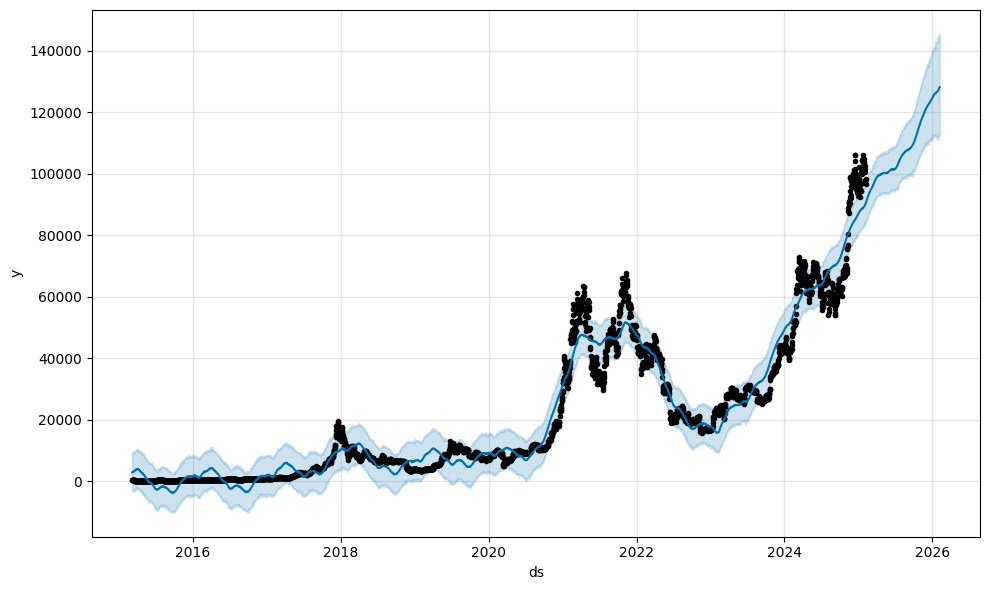

In [60]:
fig = model.plot(prediction)
plt.show()

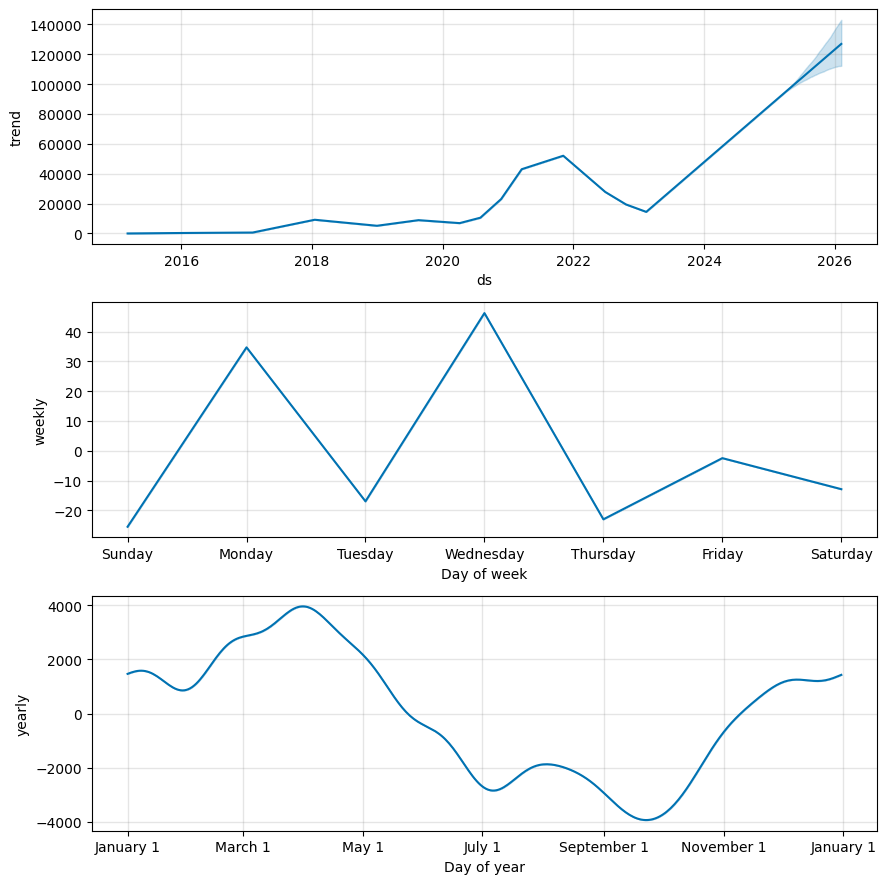

In [61]:
#seasonality
fig_2 = model.plot_components(prediction)
plt.show()

## 7. Diagnostics

In [62]:
df_cv = cross_validation(model, horizon = '365 days')

INFO:prophet:Making 12 forecasts with cutoffs between 2018-08-09 12:00:00 and 2024-02-07 00:00:00


  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqi5v1d5/ha6i2vjj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqi5v1d5/k69lwaqd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55984', 'data', 'file=/tmp/tmpzqi5v1d5/ha6i2vjj.json', 'init=/tmp/tmpzqi5v1d5/k69lwaqd.json', 'output', 'file=/tmp/tmpzqi5v1d5/prophet_modelu819e9yh/prophet_model-20250206091341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:13:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:13:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqi5v1d5/cqlnt9qe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqi5v1d5/m4ulf7jc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [63]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
4375,2025-02-02,37033.800001,20855.575361,52952.180288,97688.976562,2024-02-07
4376,2025-02-03,37154.088638,19745.825310,53306.169825,101405.421875,2024-02-07
4377,2025-02-04,37259.538588,20030.455795,52798.431140,97871.820312,2024-02-07
4378,2025-02-05,37407.148207,20402.171338,53880.011985,96615.445312,2024-02-07
4379,2025-02-06,37440.467220,21097.807655,54227.519530,98125.453125,2024-02-07


In [64]:
df_performance = performance_metrics(df_cv)

In [65]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days 12:00:00,2.044928e+08,14300.099183,9907.282238,0.329983,0.322702,0.353110,0.315068
1,37 days 00:00:00,2.109123e+08,14522.821599,10087.529331,0.335034,0.325224,0.358784,0.310502
2,37 days 12:00:00,2.095891e+08,14477.193773,10031.931838,0.334794,0.325224,0.357977,0.315068
3,38 days 00:00:00,2.158825e+08,14692.939180,10211.477064,0.339799,0.327125,0.363746,0.310502
4,38 days 12:00:00,2.144396e+08,14643.757773,10154.491278,0.339578,0.326650,0.362968,0.312785
...,...,...,...,...,...,...,...,...
653,363 days 00:00:00,1.627645e+09,40344.076530,31844.179446,1.101387,0.873889,1.149513,0.244292
654,363 days 12:00:00,1.622128e+09,40275.649298,31761.608414,1.096138,0.877962,1.148598,0.246575
655,364 days 00:00:00,1.629114e+09,40362.290181,31877.821652,1.097179,0.877962,1.149254,0.244292
656,364 days 12:00:00,1.622457e+09,40279.731061,31781.620340,1.091664,0.877962,1.148213,0.248858
